In [21]:
!kaggle competitions download -c titanic

HTTPSConnectionPool(host='storage.googleapis.com', port=443): Max retries exceeded with url: /kaggle-competitions-data/kaggle-v2/3136/26502/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1767620314&Signature=m4IF8tPMkgGgVWL6V1pyJAc4NVTaHoe%2FkmLVOBYhCZ2FH%2BOrwd%2BYNRLqmXXCrUnLfaCEUr0iBUd%2Bnmzxa%2FqfCl7fx73XQlQTrI5zcZFedBPFsPSkPbwOlDcA3VUR8FGLrQt9TpiPlAt5rsKSJv9CMpjW5ofS8DDjYmESVt7R8jMaYe%2F%2FZl%2FEgHjJnfOQY6pRwDAhpWEq8Bf%2BfSeCJnQ74ThSbysSymoHFJ2m%2FyX5IYORCVXHMpCc7KbsXjSgPejf81FvygCITrZFzvDd6UBp8xZisJrq0urlURLfWafA0eWJqcs1MkbLWjna7gZMfLP%2FVoV25RMDVY%2BGcMfIgMqAGA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtitanic.zip (Caused by SSLError(SSLZeroReturnError(6, 'TLS/SSL connection has been closed (EOF) (_ssl.c:1147)')))


In [29]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

# 解压数据集
path = "titanic"
if not os.path.exists(path=path):
    os.makedirs(name=path)
fp = zipfile.ZipFile("titanic.zip", 'r')
fp.extractall(path)

# 读取数据
train_csv = pd.read_csv(filepath_or_buffer=f"{path}/train.csv")
tests_csv = pd.read_csv(filepath_or_buffer=f"{path}/test.csv")
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
# 提取labels
all_labels = train_csv['Survived']
# 合并TrainDataset和TestDataset
all_features = pd.concat((train_csv.iloc[:, 2:], tests_csv.iloc[:, 1:]))
# 重置索引
all_features.reset_index(drop=True)
all_features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
all_features['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [5]:
# 包含信息需要新建特征的列：Name（Name中包含姓氏，相同姓氏的可能为同一家族，一个家族存在多个人，人数与获救概率可能存在较大影响）
# 方式包括：基于相同姓氏分组，根据数量表示当前同行人数、使用离散值表示，当前是否独自或非独自登船；

In [37]:
# 存在大量空值的列：Cabin
# 当前Cabin列存在较大占比的空置，这种情况主要有两种处理方式：
#   1.直接删除处理，若当前列对目标影响较小时；
#   2.如果特征对目标存在较大影响不可删除时，则考虑创建新的类别，使用特定值来填充空值（如：Unknow或Missing）
#   3.当前数据集中，Cabin与Name存在关系，同一个家庭的会购买相同的位置
all_features['Cabin'] = all_features['Cabin'].fillna('Missing')
all_features['Cabin'].value_counts()

Cabin
Missing            1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

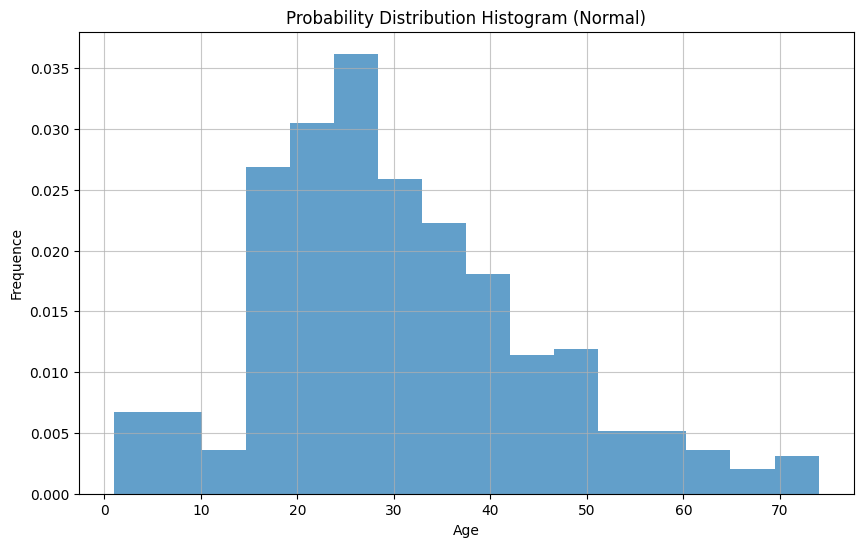

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Age, Length: 1309, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
# 年龄列：年龄特征通常进行分箱操作，一般在当前场景下获救会以年轻和较老的进行有限救援，因此考虑分箱为儿童、青壮年、老年进行分箱
survived_age = train_csv['Age'][train_csv['Survived'] == 0] # 提取获救-年龄分布图
plt.figure(figsize=(10, 6))
plt.hist(survived_age, bins='auto', density=True, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.title("Probability Distribution Histogram (Normal)")
plt.grid(visible=True, alpha=0.7)
plt.show()
all_features['Age'] = all_features['Age'].fillna(all_features['Age'].mean()) # 使用均值填充
all_features['Age'] = pd.cut(all_features['Age'], bins=[0, 18, 50, 100], labels=["未成年", "青壮年", "老年"]) # 根据分布对年龄分箱
all_features['Age'] = (all_features['Age'].map({"未成年": 0, "青壮年": 1, "老年": 2})).astype(int)
all_features['Age']

In [8]:
# Fare表示旅客票价：票价的高、中、低可能影响目标，可考虑对票价进行分箱或是进行标准化（Kaggle中使用区间对Fare进行分箱操作）
all_features['Fare'].value_counts()
all_features['Fare'].mean()

33.29547928134557